In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
data = pd.read_csv(r'C:\Users\Aasish\Desktop\ASU\CSE 578 - Data Visualisation\Project\adult.data', header=None, names=columns)
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Replace "?" values with "Not Available"
data['workclass'] = data['workclass'].replace('?', 'Not Available')
data['occupation'] = data['occupation'].replace('?', 'Not Available')
data['native-country'] = data['native-country'].replace('?', 'Not Available')

In [1]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.


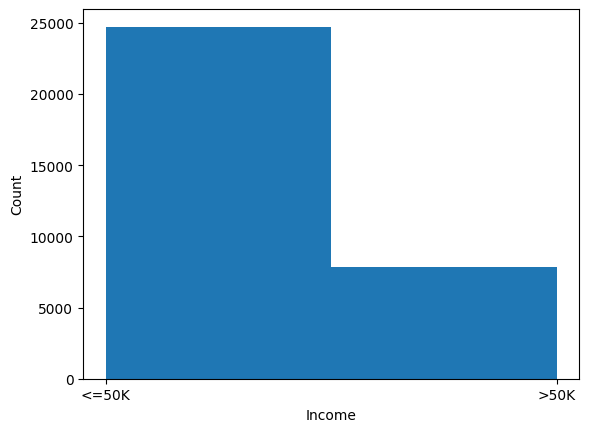

In [2]:
plt.hist(data['income'], bins=2)
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

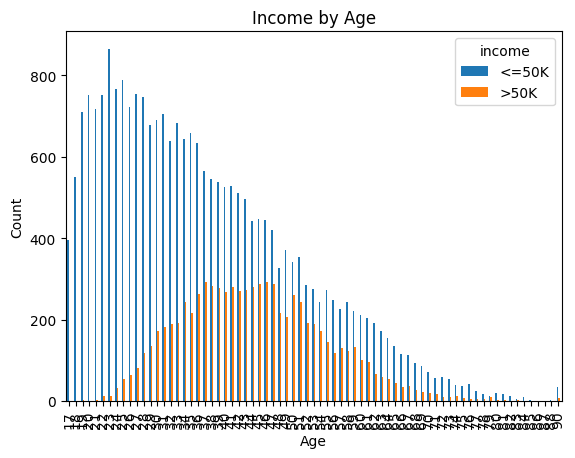

In [31]:
# Bar chart of income by age
age_income = data.groupby(['age', 'income']).size().unstack()
age_income.plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Income by Age')
plt.show()



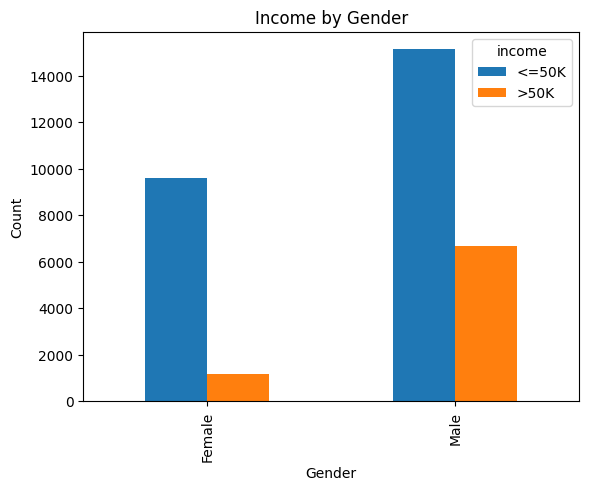

In [7]:
# Bar chart of income by gender
gender_income = data.groupby(['sex', 'income']).size().unstack()
gender_income.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Income by Gender')
plt.show()

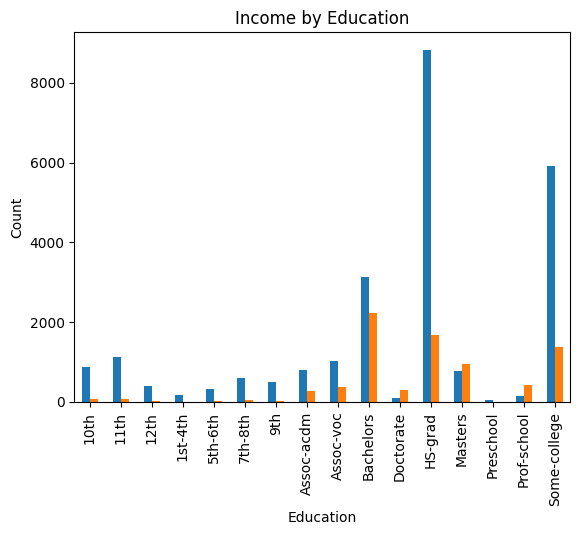

In [8]:
# Bar chart of income by education
education_income = data.groupby(['education', 'income']).size().unstack()
education_income.plot(kind='bar', legend=False)
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Income by Education')
plt.show()

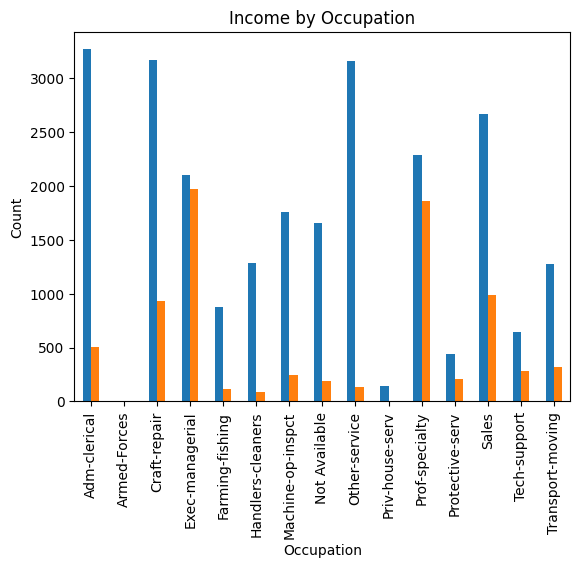

In [9]:
# Bar chart of income by occupation
occupation_income = data.groupby(['occupation', 'income']).size().unstack()
occupation_income.plot(kind='bar', legend=False)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Income by Occupation')
plt.show()

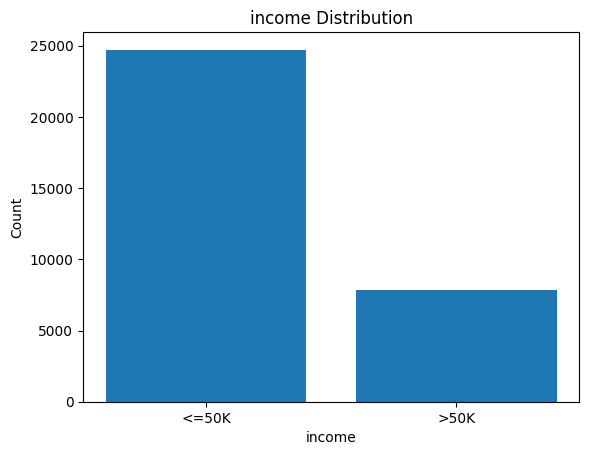

In [10]:
# Create bar chart showing the distribution of salaries
income_count = data["income"].value_counts()
plt.bar(["<=50K", ">50K"], income_count)
plt.title("income Distribution")
plt.xlabel("income")
plt.ylabel("Count")
plt.show()

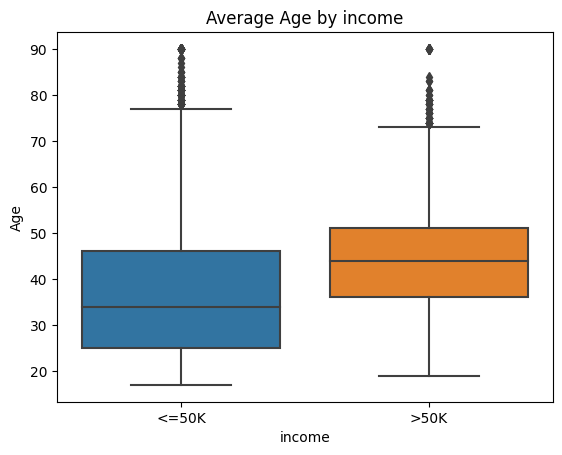

In [11]:
# Create box plot showing average age by income
sns.boxplot(x="income", y="age", data=data)
plt.title("Average Age by income")
plt.xlabel("income")
plt.ylabel("Age")
plt.show()

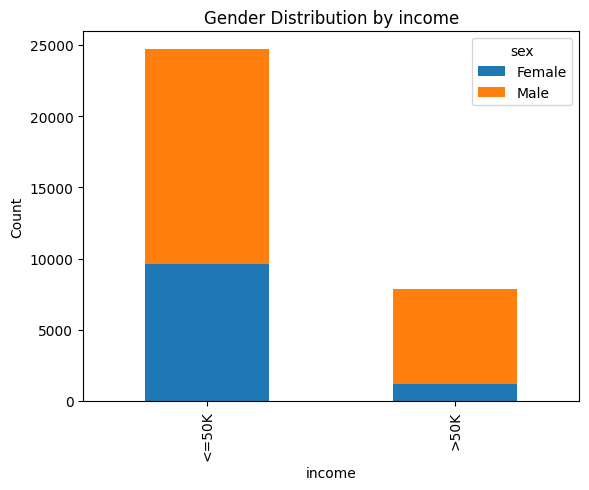

In [12]:
# Create stacked bar chart showing gender distribution by income
gender_count = data.groupby(["income", "sex"]).size().unstack()
gender_count.plot(kind="bar", stacked=True)
plt.title("Gender Distribution by income")
plt.xlabel("income")
plt.ylabel("Count")
plt.show()


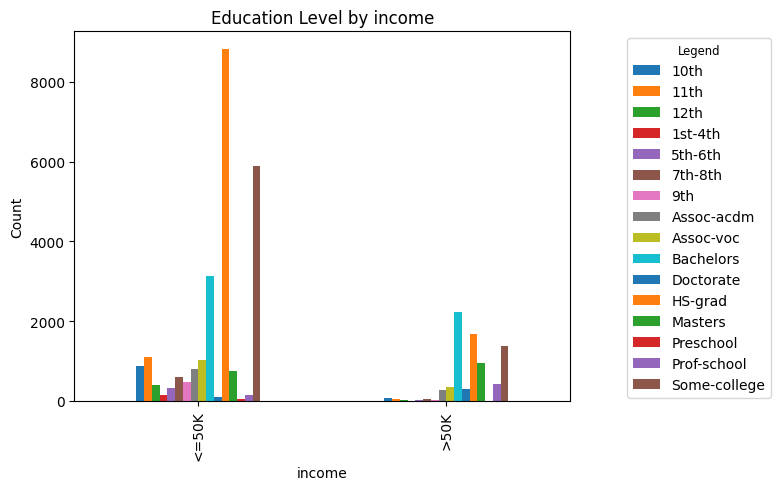

In [13]:
# Create grouped bar chart showing education level by income
edu_count = data.groupby(["income", "education"]).size().unstack()
edu_count.plot(kind="bar", stacked=False)
plt.title("Education Level by income")
plt.xlabel("income")
plt.ylabel("Count")
plt.legend(title="Legend", bbox_to_anchor=(1.1, 1), title_fontsize='small', prop={"size": 10})
plt.show()

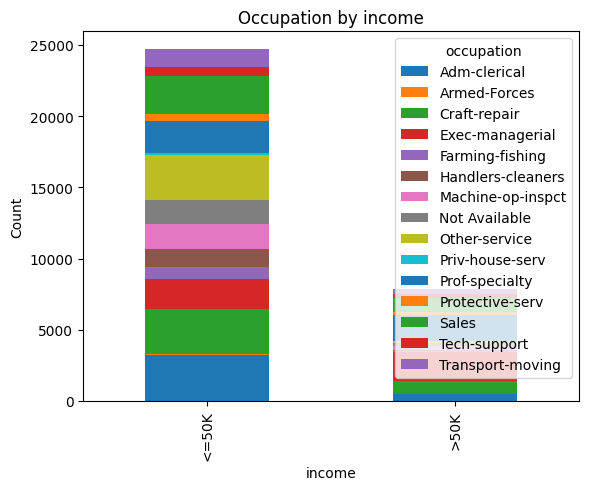

In [14]:
# Create stacked bar chart showing occupation by income
occ_count = data.groupby(["income", "occupation"]).size().unstack()
occ_count.plot(kind="bar", stacked=True)
plt.title("Occupation by income")
plt.xlabel("income")
plt.ylabel("Count")
plt.show()

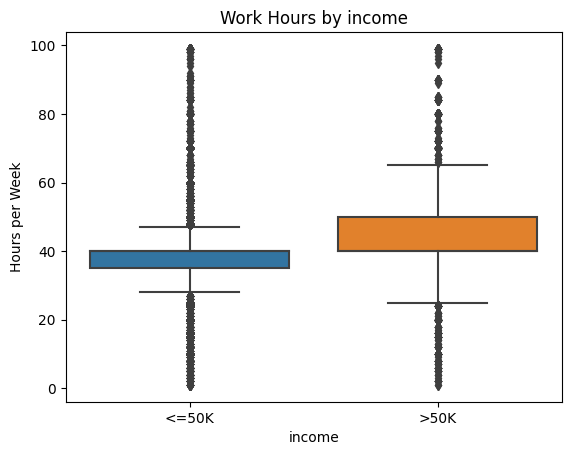

In [15]:
# Create box plot showing work hours by income
sns.boxplot(x="income", y="hours-per-week", data=data)
plt.title("Work Hours by income")
plt.xlabel("income")
plt.ylabel("Hours per Week")
plt.show()


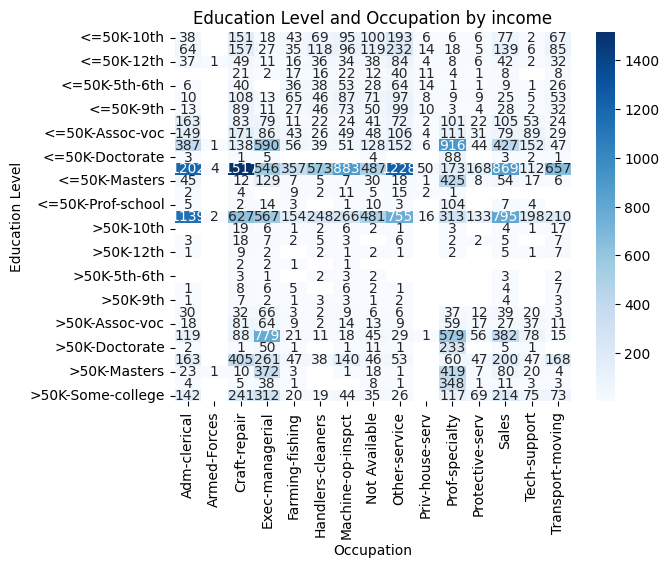

In [16]:
# Create heat map showing education level and occupation by income
edu_occ_count = data.groupby(["income", "education", "occupation"]).size().unstack()
#sns.set(rc={'figure.figsize':(12,12)})
sns.heatmap(edu_occ_count, cmap="Blues", annot=True, fmt=".0f")
plt.title("Education Level and Occupation by income")
plt.xlabel("Occupation")
plt.ylabel("Education Level")
plt.show()

In [39]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

In [5]:
adults_data_frame = pd.read_csv(r'C:\Users\Aasish\Desktop\ASU\CSE 578 - Data Visualisation\Project\adult.data', header=None,sep=", ",engine='python')
adults_data_frame.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
adults_data_frame = adults_data_frame[adults_data_frame["workclass"] != '?'] 
adults_data_frame = adults_data_frame[adults_data_frame["education"] != '?'] 
adults_data_frame = adults_data_frame[adults_data_frame["marital-status"] != '?'] 
adults_data_frame = adults_data_frame [adults_data_frame["occupation"] != '?'] 
adults_data_frame = adults_data_frame [adults_data_frame["relationship"] != '?'] 
adults_data_frame = adults_data_frame[adults_data_frame["race"] != '?' ] 
adults_data_frame = adults_data_frame [adults_data_frame["sex"] != '?'] 
adults_data_frame = adults_data_frame [adults_data_frame["native-country"] != '?'] 
income_below_50K = adults_data_frame [adults_data_frame["income"] == "<=50K"] 
income_above_50K = adults_data_frame [adults_data_frame["income"] == ">50K" ]
adults_data_frame['class'] = (adults_data_frame["income"] == ">50K")*1

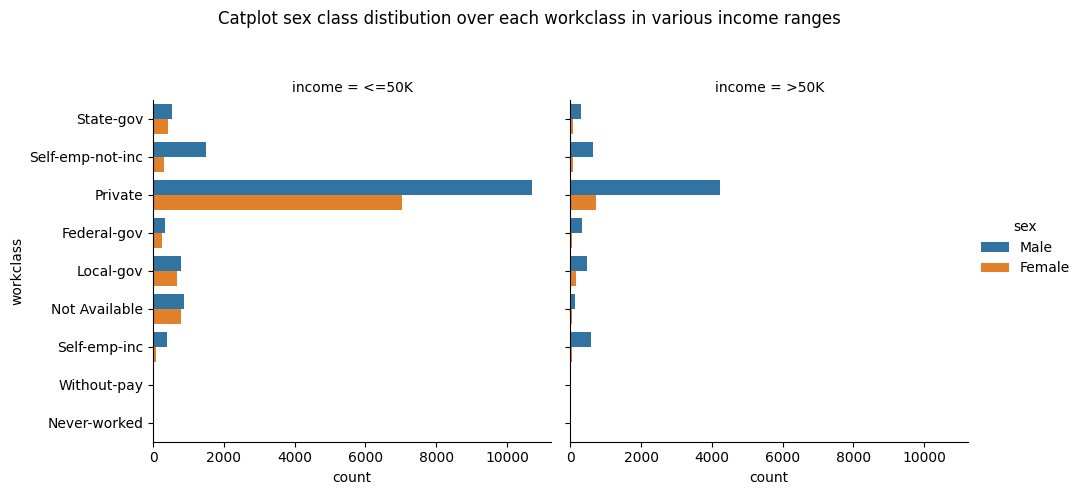

In [6]:
def workclass_sex(dm):
    catPlot = sns.catplot(y="workclass", col="income", hue="sex", kind="count", data=dm) 
    catPlot.fig.suptitle("Catplot sex class distibution over each workclass in various income ranges") 
    catPlot.fig.subplots_adjust(top=0.8)
workclass_sex(data)

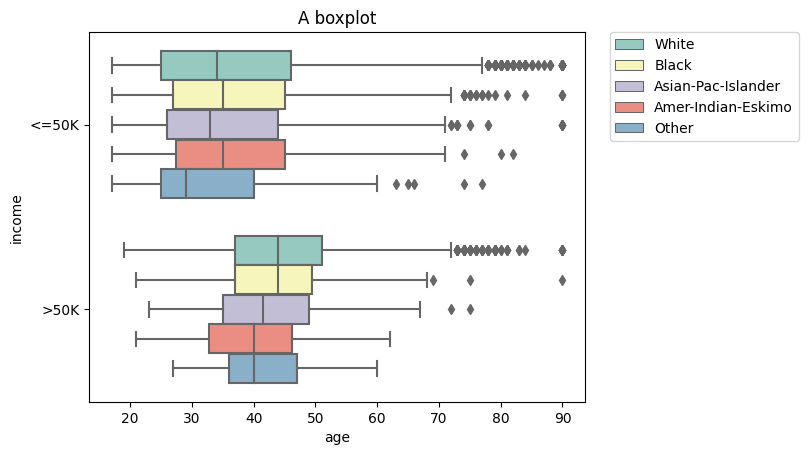

In [7]:
boxplot = sns.boxplot (x="age", y="income", hue="race", data=data, palette="Set3").set(title="A boxplot") 
plt.legend (bbox_to_anchor= (1.05, 1), loc=2, borderaxespad=0.)

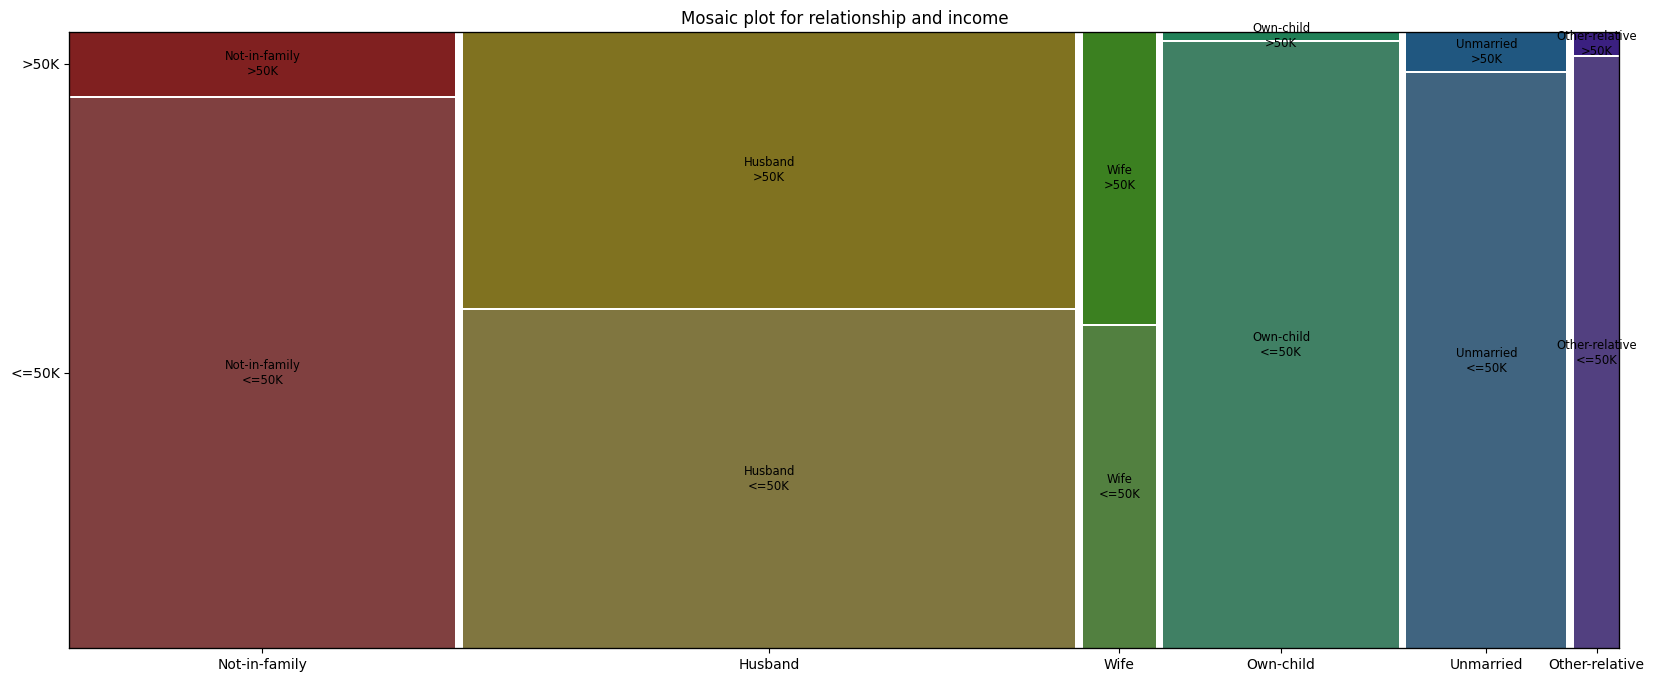

In [40]:
fig, axes = plt.subplots (ncols=1, nrows=1, figsize=(20,8))
mosaic (data, ['relationship', 'income'], ax=axes, axes_label=True) 
plt.title("Mosaic plot for relationship and income")
plt.show()

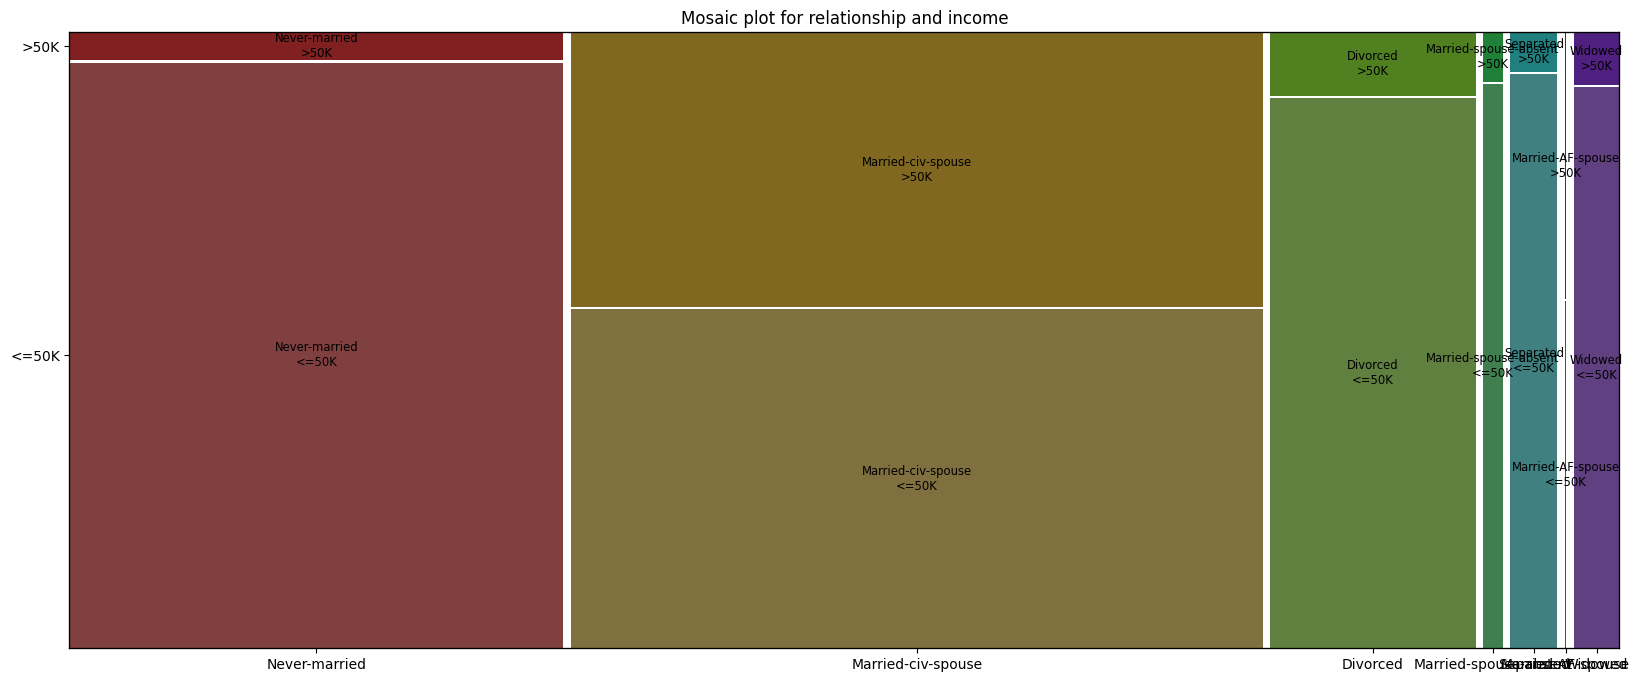

In [42]:
fig, axes = plt.subplots (ncols=1, nrows=1, figsize=(20,8))
mosaic (data, ['marital-status', 'income'], ax=axes, axes_label=True) 
plt.title("Mosaic plot for relationship and income")
plt.show()

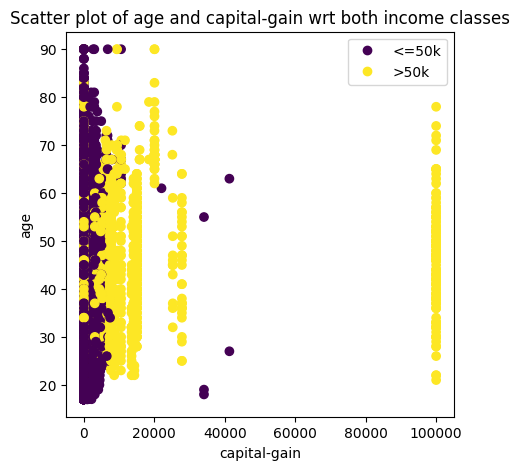

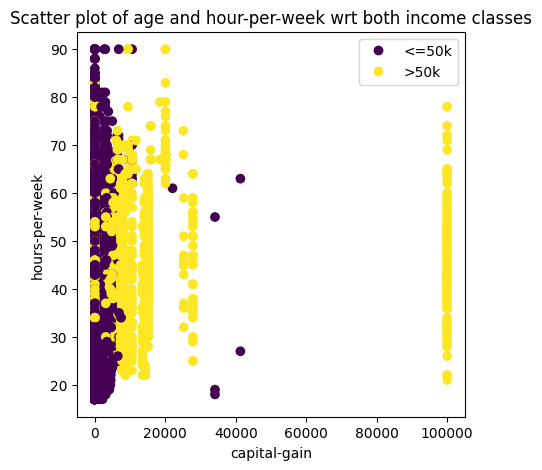

In [9]:

def scatter_plot(col1, col2, col3): 
    plt.figure(figsize=(5,5))
    colors = adults_data_frame['class'] 
    x = adults_data_frame[col1]
    y = adults_data_frame[col2]
    z = plt.scatter (x,y,c=colors)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title("Scatter plot of age and capital-gain wrt both income classes") 
    plt.legend(labels=['<=50k','>50k'],handles=z.legend_elements()[0]) 
    plt.show()
    plt.figure(figsize=(5,5))
    X = adults_data_frame[col1]
    У = adults_data_frame[col3]
    z = plt.scatter(x,y,c=colors)
    plt.xlabel(col1)
    plt.ylabel(col3)
    plt.title("Scatter plot of age and hour-per-week wrt both income classes")
    plt.legend (labels=['<=50k','>50k'],handles=z.legend_elements()[0]) 
    plt.show()
scatter_plot('capital-gain', 'age', 'hours-per-week')

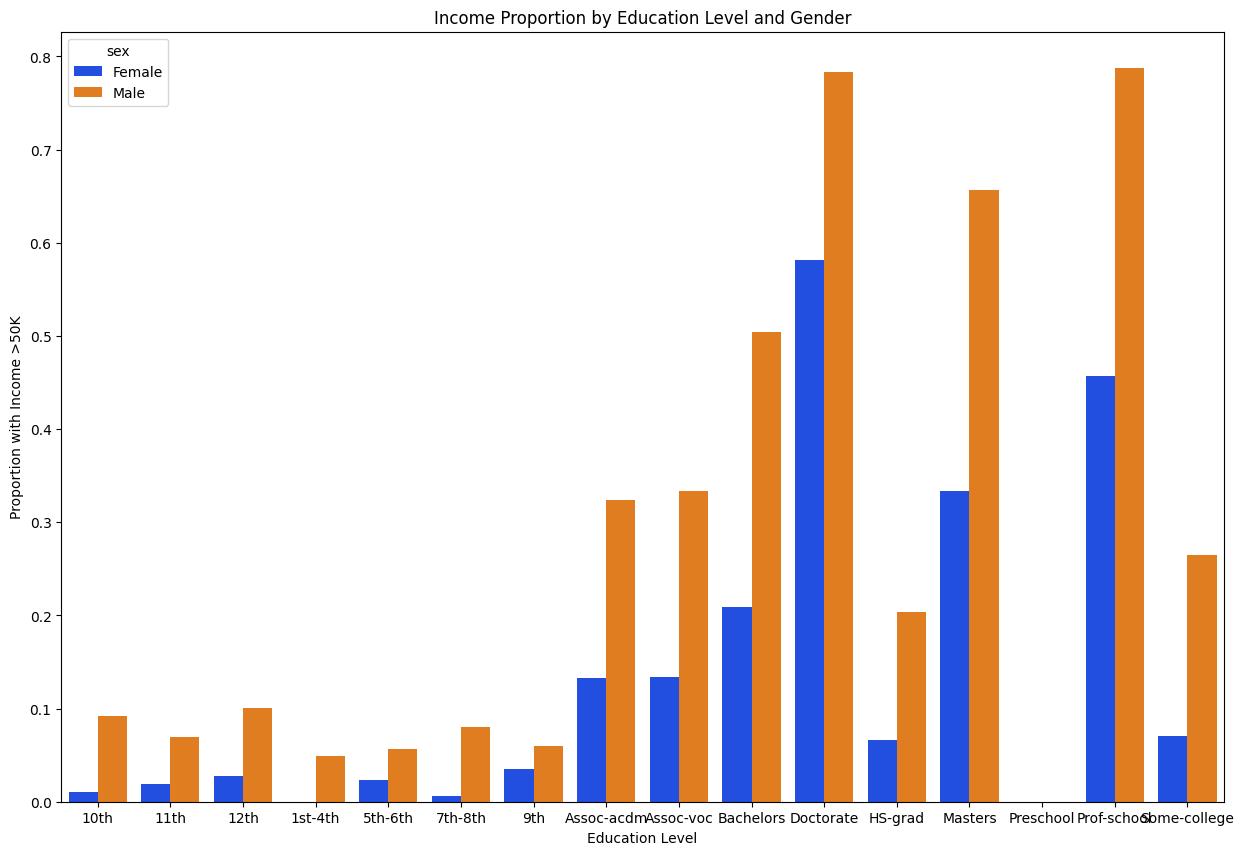

In [10]:
# Create a new DataFrame with just the relevant columns
income_by_edu_gender = data[['income', 'education', 'sex']]

# Remove individuals with missing values
income_by_edu_gender = income_by_edu_gender.dropna()

# Convert income to a binary variable (0 if income <= 50K, 1 if income > 50K)
income_by_edu_gender['income'] = income_by_edu_gender['income'].map({'<=50K': 0, '>50K': 1})

# Group the data by education, sex, and income, and count the number of individuals in each group
income_by_edu_gender = income_by_edu_gender.groupby(['education', 'sex', 'income']).size().reset_index(name='counts')

# Pivot the data to create a stacked bar plot
income_by_edu_gender = income_by_edu_gender.pivot_table(index=['education', 'sex'], columns='income', values='counts')

# Calculate the total number of individuals in each group
income_by_edu_gender['total'] = income_by_edu_gender.sum(axis=1)

# Calculate the proportion of individuals in each income group
income_by_edu_gender['<=50K'] = income_by_edu_gender[0] / income_by_edu_gender['total']
income_by_edu_gender['>50K'] = income_by_edu_gender[1] / income_by_edu_gender['total']

# Reset the index
income_by_edu_gender = income_by_edu_gender.reset_index()
plt.figure(figsize=(15, 10))
# Create a stacked bar plot of income by education level, broken down by gender
sns.barplot(data=income_by_edu_gender, x='education', y='>50K', hue='sex', palette='bright', errorbar=None)

# Add labels and a title
plt.xlabel('Education Level')
plt.ylabel('Proportion with Income >50K')
plt.title('Income Proportion by Education Level and Gender')
plt.show()

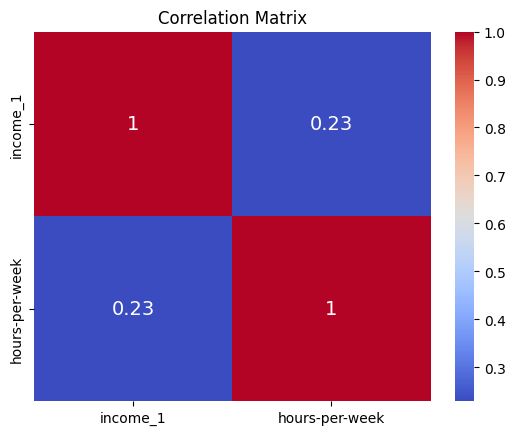

In [3]:
data['income_1'] = data['income'].map({'<=50K': 0, '>50K': 1})

# Create a correlation matrix
corr_matrix = data[['income_1', 'hours-per-week']].corr()

# Create a heatmap to visualize the correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, annot_kws={"size": 14})

# Set the title
plt.title('Correlation Matrix')

# Show the plot
plt.show()

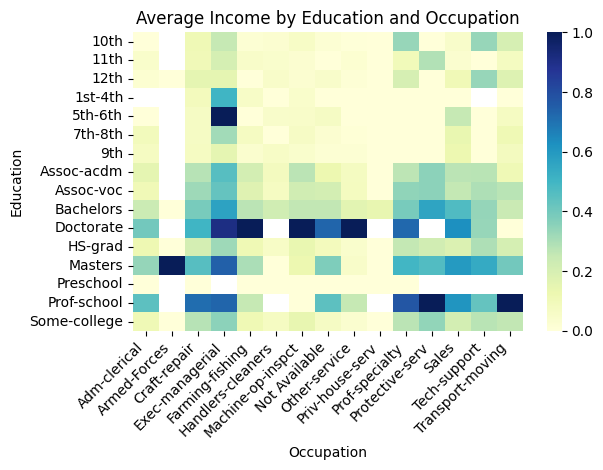

In [4]:
# Create a pivot table that shows the average income for each combination of education and occupation
pivot_table = data.pivot_table(index='education', columns='occupation', values='income_1', aggfunc='mean')

# Create a heatmap using Seaborn
sns.heatmap(pivot_table, cmap='YlGnBu')

# Customize the plot
plt.title('Average Income by Education and Occupation')
plt.xlabel('Occupation')
plt.ylabel('Education')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


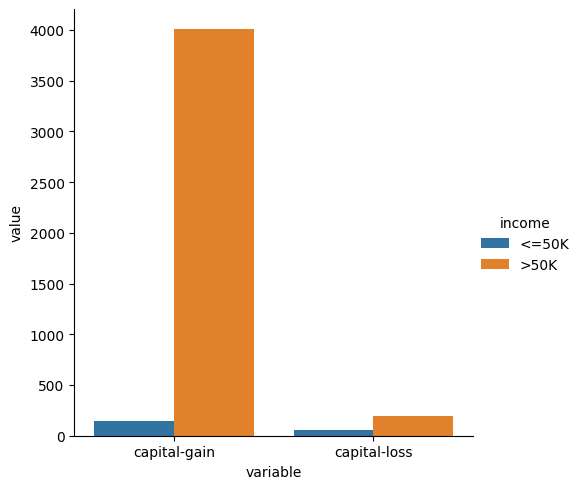

In [6]:
# Select relevant columns for the plot
subset = data[['income', 'capital-gain', 'capital-loss']]

# Compute summary statistics by income level
summary = subset.groupby('income').mean().reset_index()

# Melt summary data to long format
melted = summary.melt(id_vars='income', var_name='variable', value_name='value')

# Plot grouped bar plot
sns.catplot(data=melted, x='variable', y='value', hue='income', kind='bar')
plt.show()


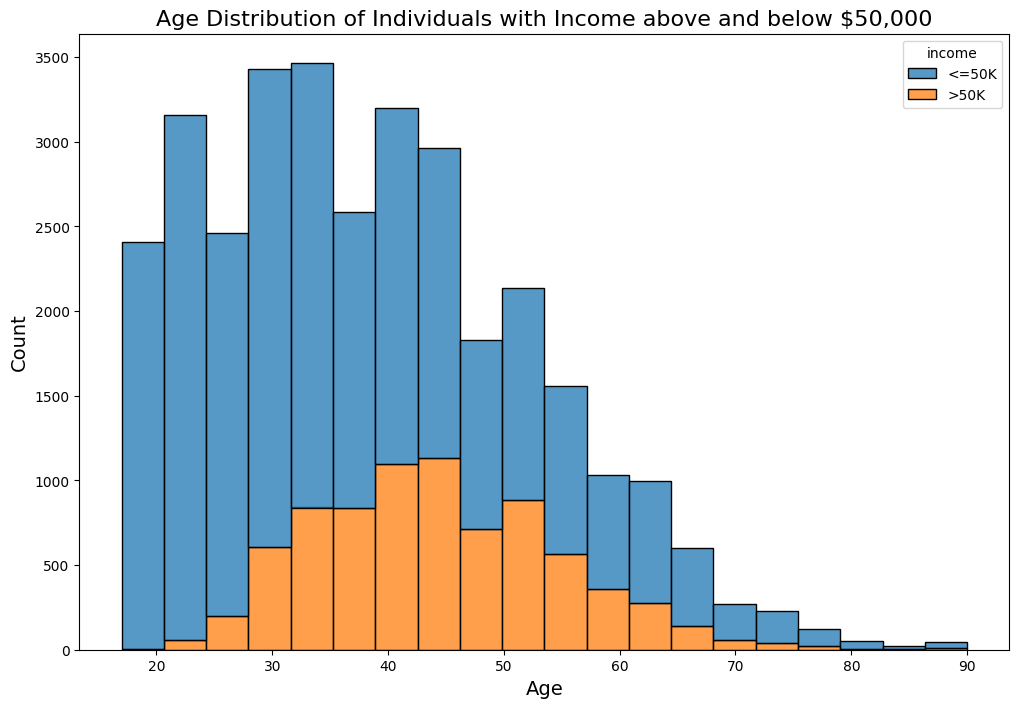

In [7]:
fig, ax = plt.subplots(figsize=(12,8))
sns.histplot(data=data, x='age', hue='income', kde=False, bins=20, multiple='stack', palette=['tab:blue', 'tab:orange'], ax=ax)
ax.set_title('Age Distribution of Individuals with Income above and below $50,000', fontsize=16)
ax.set_xlabel('Age', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
plt.show()

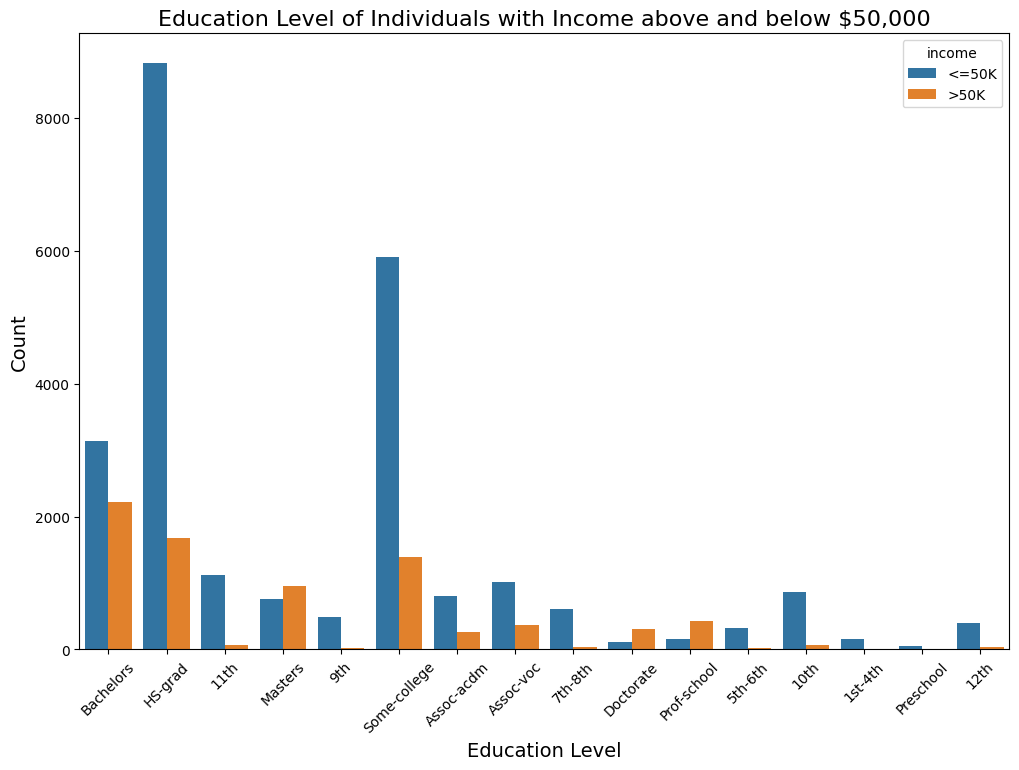

In [8]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(data=data, x='education', hue='income', palette=['tab:blue', 'tab:orange'], ax=ax)
ax.set_title('Education Level of Individuals with Income above and below $50,000', fontsize=16)
ax.set_xlabel('Education Level', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.tick_params(axis='x', rotation=45)
plt.show()

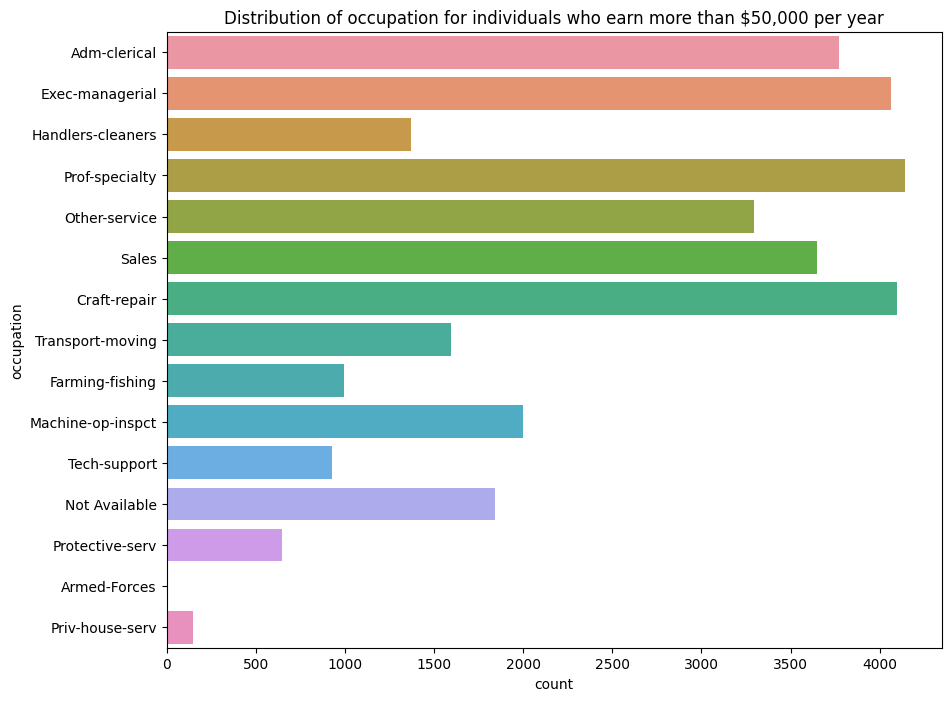

In [12]:
# Filter the data for individuals who earn more than $50,000 per year
data_above_50k = data[data['income'] == '>50K']

# Create a countplot to show the distribution of occupation for individuals who earn more than $50,000 per year
plt.figure(figsize=(10,8))
sns.countplot(y='occupation', data=data_above_50k)
plt.title('Distribution of occupation for individuals who earn more than $50,000 per year')
plt.show()


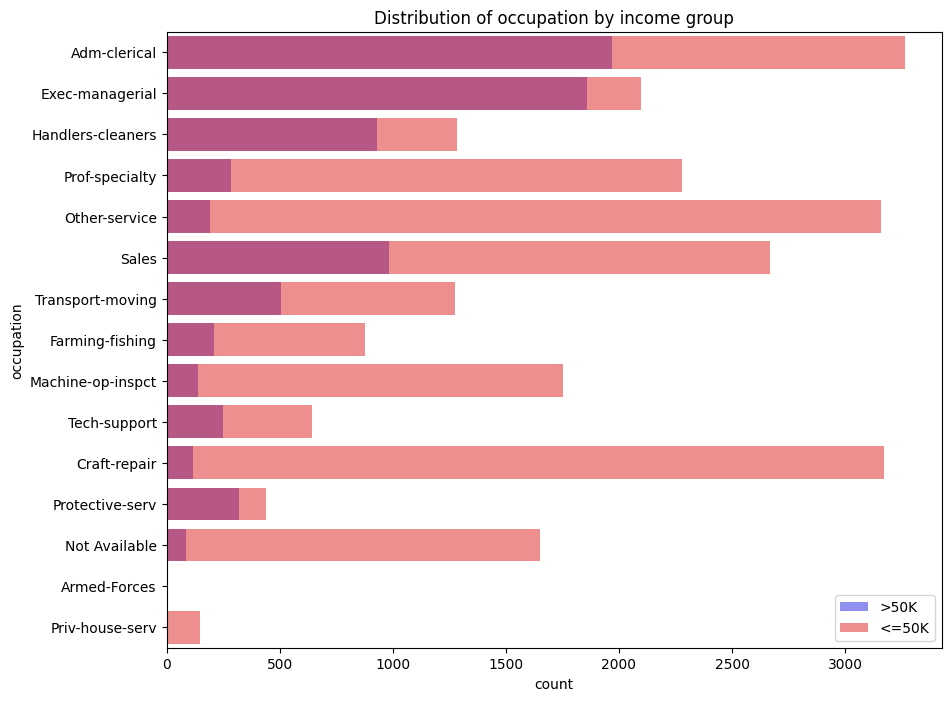

In [22]:
# Filter the data for individuals who earn more than $50,000 per year
data_above_50k = data[data['income'] == '>50K']
data_below_50k = data[data['income'] == '<=50K']

# Create a countplot to show the distribution of occupation by income group
plt.figure(figsize=(10,8))
sns.countplot(y='occupation', data=data_above_50k, color='blue', alpha=0.5, label='>50K')
sns.countplot(y='occupation', data=data_below_50k, color='red', alpha=0.5, label='<=50K', 
              dodge=True)
plt.title('Distribution of occupation by income group')
plt.legend()
plt.show()


<Figure size 1000x800 with 0 Axes>

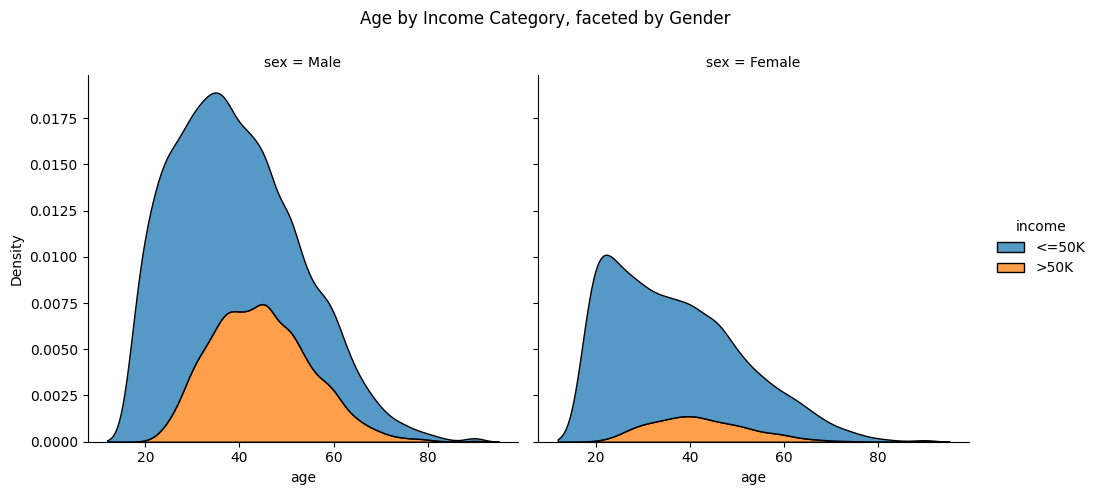

In [32]:
# Create a density plot of age by income category, faceted by gender
plt.figure(figsize=(10, 8))
sns.displot(data, x="age", hue="income", col="sex", kind="kde", fill=True, multiple="stack")
plt.subplots_adjust(top=0.85)
plt.suptitle('Age by Income Category, faceted by Gender')
plt.show()


<Figure size 1000x800 with 0 Axes>

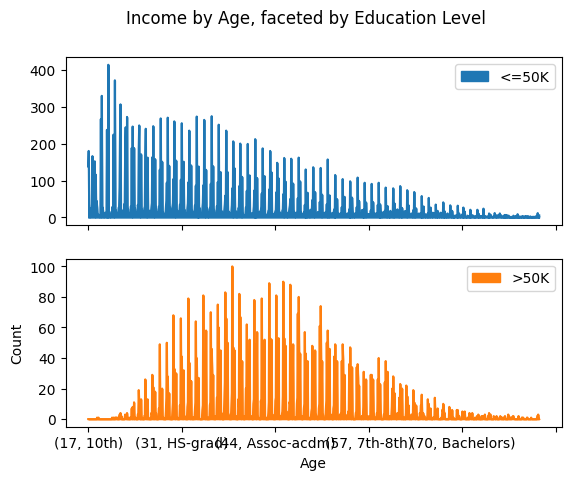

In [34]:
# Count the number of individuals in each income category for each age and education level
age_education_income = data.groupby(['age', 'education', 'income']).size().unstack()

# Create a stacked area chart of the results, faceted by education level
plt.figure(figsize=(10, 8))
age_education_income.plot(kind='area', stacked=True, subplots=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.suptitle('Income by Age, faceted by Education Level')
plt.show()


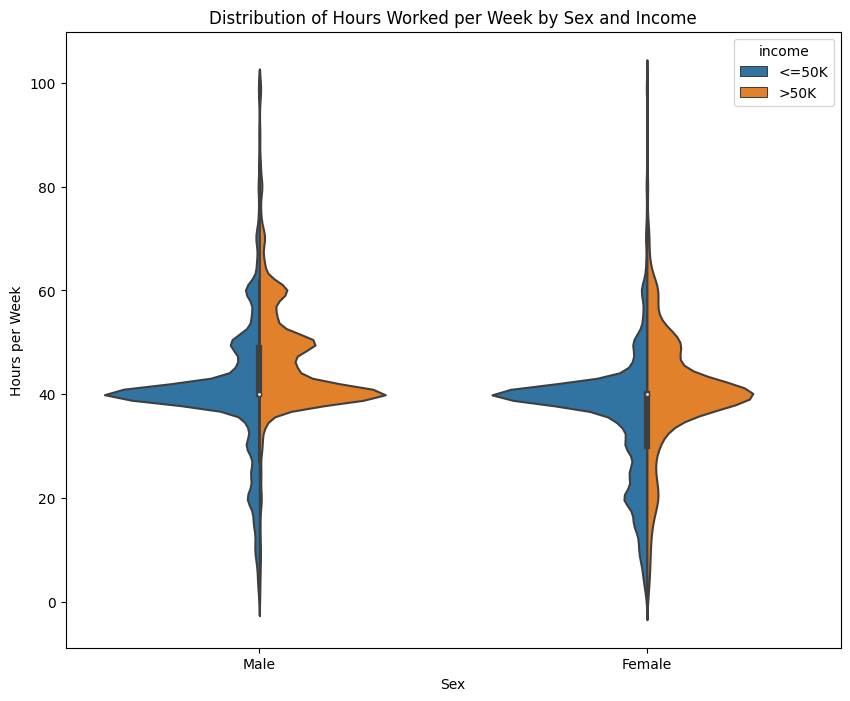

In [35]:
# Create a violin plot of hours worked per week, faceted by sex and income
plt.figure(figsize=(10, 8))
sns.violinplot(x='sex', y='hours-per-week', hue='income', data=data, split=True)
plt.xlabel('Sex')
plt.ylabel('Hours per Week')
plt.title('Distribution of Hours Worked per Week by Sex and Income')
plt.show()
